<a href="https://colab.research.google.com/github/Artenida/computer_vision_lessons/blob/main/Thresholding_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentation by Thresholding**

In [3]:
import skimage as sk
import numpy as np

I = sk.data.camera() # load RGM image
#Reshapes the 2D image into a 2D column vector
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1)) # reshape image as NPIX x NCHANNELS array
#(512x512, 1)
print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],1))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],1))

v_I.shape

Here N = 262144 and d = 1
The shape of the array should be 262144 x 1


(262144, 1)

The histogram shows how frequently each pixel intensity appears in the image — this is useful to:

*   Understand brightness/contrast
*   Choose a threshold for segmentation
*   Analyze image exposure

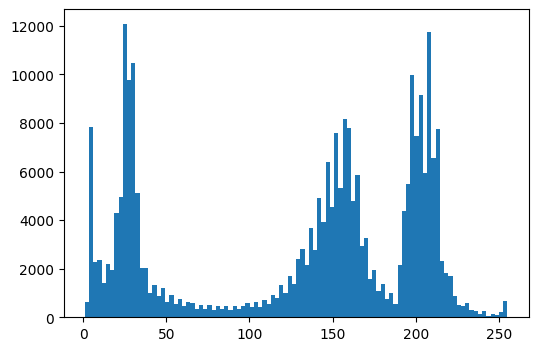

In [4]:
import matplotlib.pyplot as plt

flat_data = I.flatten() # converts the 2D image into a 1D array
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()

We define two intensity thresholds to create three classes:

Dark pixels (intensity ≤ T1)

Medium pixels (T1 < intensity < T2)

Bright pixels (intensity ≥ T2)

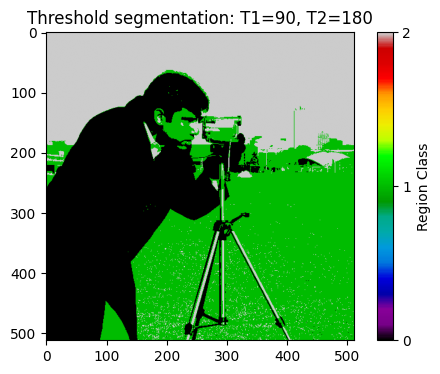

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk

# Load grayscale image
I = sk.data.camera()

# Define thresholds manually
T1 = 90
T2 = 180

# Segment the image into 3 regions
data_color = np.zeros_like(I)
data_color[I > T2] = 2
data_color[(I > T1) & (I <= T2)] = 1
# Remaining (I <= T1) stay as 0

# Plot with auto-assigned colors
fig = plt.figure(figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(data_color, cmap='nipy_spectral')  # or 'tab10', 'Set1', etc.
plt.title(f'Threshold segmentation: T1={T1}, T2={T2}')
plt.colorbar(ticks=[0, 1, 2], label='Region Class')
plt.show()

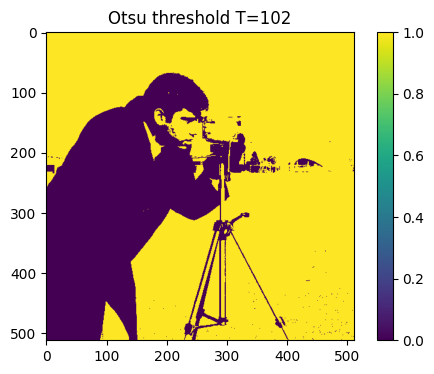

In [ ]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

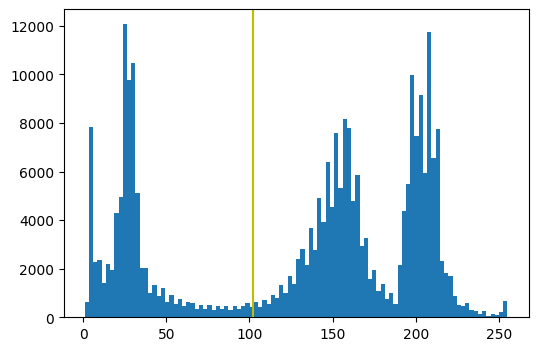

In [ ]:
flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.axvline(thresh,color='y')
plt.show()

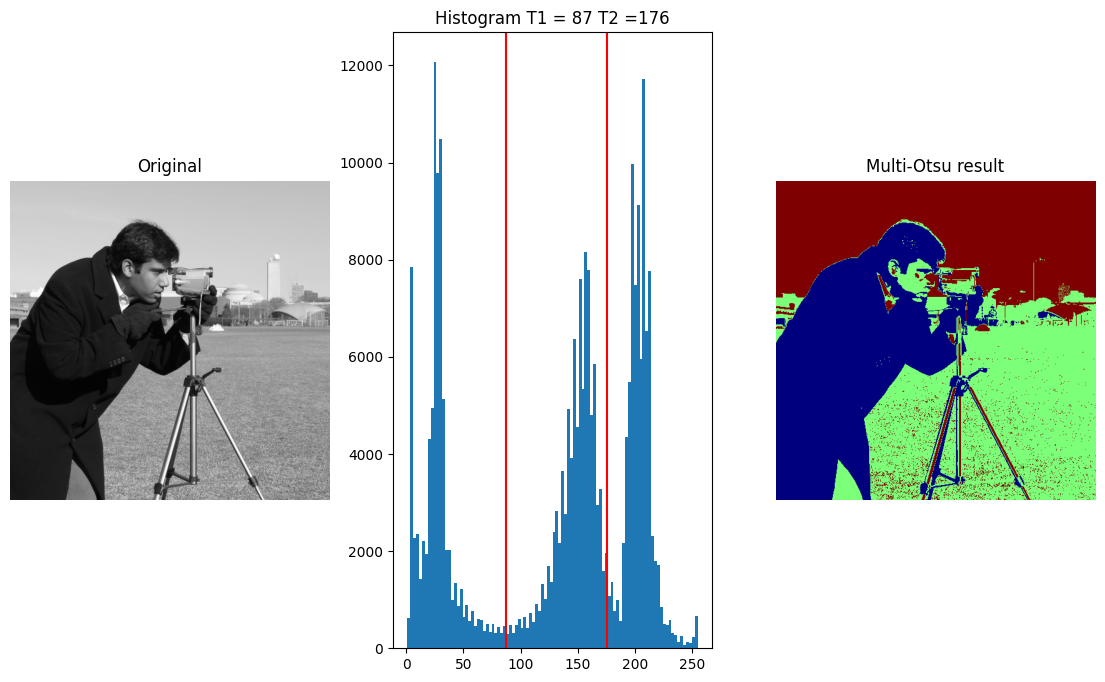

In [ ]:
from skimage.filters import threshold_multiotsu

# Applying multi-Otsu threshold for the default value, generating
# three classes by default
thresholds = threshold_multiotsu(I)

# Using the threshold values, we generate the three regions.
regions = np.digitize(I, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting the original image.
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(flat_data, bins=100,range=[1,flat_data.max()])
ax[1].set_title('Histogram T1 = {} T2 ={}'.format(thresholds[0],thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()